# Comparing Distillation Rounds

In [12]:
from nested_factories import t_factories, T_gate, T_Factory

import numpy as np
import seaborn as sbs
import matplotlib.pyplot as plt

def plt_data(condition, x_axis, y_axis, target=None):
    # Small Helper Function
    data = filter(lambda x: x[0] == target, zip(condition, x_axis, y_axis))
    x = []
    y = []
    for _, x_val, y_val in data:
        x.append(x_val)
        y.append(y_val)
    return {'x':x, 'y':y}   

In [13]:
# Style Params
sbs.set_context("paper")
sbs.set_theme()
sbs.set_style("dark")
sbs.set_style("whitegrid", {'grid.linestyle': '-.'})

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

In [15]:
results = {'dist':[], 'runtime':[], 'volume':[], 'size':[]}

for dist, fact in enumerate(t_factories):
    dist += 1
    gate = T_gate(factory=fact)
    for size in range(5, 60):
        try:
            qcb = T_Factory(fact, t_gate=gate, height=size, width=size)
            results['dist'].append(dist)
            results['runtime'].append(qcb.n_cycles())
            results['volume'].append(qcb.space_time_volume())
            results['size'].append(size)
            print("\r Constructed: ", dist, size, " " * 10, flush=True, end='')
            del qcb
        except:
            print("\r Failed: ", dist, size, " " * 10, flush=True, end='')
            pass

results_nest = results

 Constructed:  3 59           

Text(0.5, 0.01, '$T$ Factory Footprint $n \\times n$')

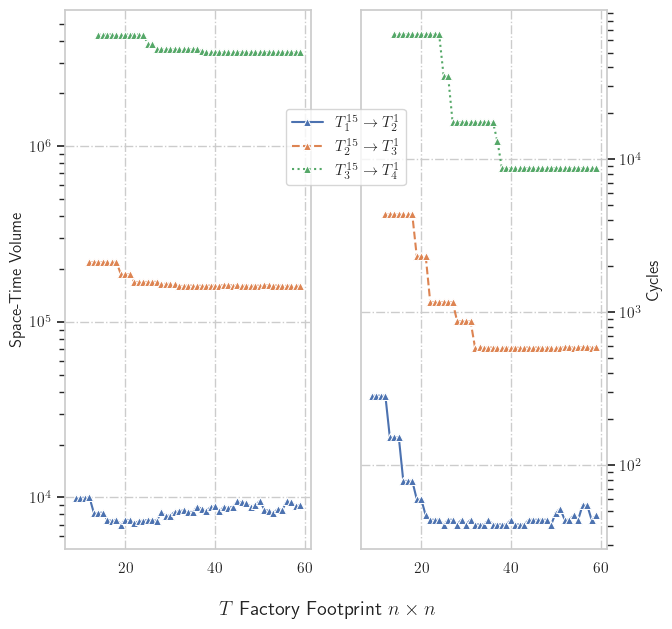

In [16]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

#f, ax = plt.subplots(figsize=(7, 7))


sbs.set_theme()
sbs.set_style("dark")
sbs.set_style("whitegrid", {'grid.linestyle': '-.'})

#locmin = mticker.LogLocator(base=10, subs=np.arange(0.1,1,0.1),numticks=20)  
#ax.yaxis.set_minor_locator(locmin)
#ax.yaxis.set_minor_formatter(mticker.NullFormatter())
#plt.grid(True,which="both")  


marks = ['', '.', 'x', '*']
linestyles = ['-', '--', ':']

res = results_nest
targ_key = 'dist'

dependent = 'volume'
independent = 'size'
#fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 7))

ax = [
    plt.subplot2grid((1, 2), (0, 0), colspan=1),
    plt.subplot2grid((1, 2), (0, 1), colspan=1)
]

subplot = ax[0]
kwargs = {
'errorbar':('ci', 100)
}

for idx, target in enumerate((1, 2, 3)):
    sbs.lineplot(
        ax=subplot,
        **plt_data(
            res[targ_key],
            res[independent],
            res[dependent],
            target=target
        ),
        label=f'DAG$_{target}$',
        linestyle=linestyles[idx],
        marker='^',
        **kwargs
    )


subplot.legend_.remove()
subplot.yaxis.set_label_position("left")
subplot.yaxis.tick_left()
subplot.set_yscale('log')
subplot.set_ylabel('Space-Time Volume')

dependent = 'runtime'

subplot = ax[1]
for idx, target in enumerate((1, 2, 3)):
    sbs.lineplot(
        ax=subplot,
        **plt_data(
            res[targ_key],
            res[independent],
            res[dependent],
            target=target
        ),
        label=f'$T^{{15}}_{{{target}}} \\rightarrow T^{{1}}_{{{target + 1}}}$',
        linestyle=linestyles[idx],
        marker='^',
        **kwargs
    )
    
subplot.legend_.remove()
subplot.yaxis.set_label_position("right")
subplot.yaxis.tick_right()
subplot.set_yscale('log')
subplot.set_ylabel('Cycles')

fig = plt.gcf()
fig.set_size_inches(7, 7)

lines = linestyles * 3

handles, labels = subplot.get_legend_handles_labels()
plt.figlegend(handles, labels, loc='upper left', bbox_to_anchor=(0.43, 0.75))

fig.supxlabel('$T$ Factory Footprint $n \\times n$')

# Comparing Factory Constructions

In [19]:
from litinski_factory import T_Factory_Lit

In [ ]:
results = {'dist':[], 'runtime':[], 'volume':[], 'size':[]}

for dist, fact in enumerate(t_factories):
    dist += 1
    gate = T_gate(factory=fact)
    for size in range(5, 60):
        try:
            qcb = T_Factory(fact, t_gate=gate, height=size, width=size)
            results['dist'].append(dist)
            results['runtime'].append(qcb.n_cycles())
            results['volume'].append(qcb.space_time_volume())
            results['size'].append(size)
            print("\r Constructed: ", dist, size, " " * 10, flush=True, end='')
        except:
            print("\r Failed: ", dist, size, " " * 10, flush=True, end='')
            pass

results_nest_cnot = results

 Failed:  2 9                  1 11           

In [ ]:
results = {'dist':[], 'runtime':[], 'volume':[], 'size':[]}

for dist, fact in enumerate(t_factories_lit):
    dist += 1
    gate = T_gate(factory=fact)
    for size in range(5, 60):
        try:
            qcb = T_Factory_Lit(fact, t_gate=gate, height=size, width=size)
            results['dist'].append(dist)
            results['runtime'].append(qcb.n_cycles())
            results['volume'].append(qcb.space_time_volume())
            results['size'].append(size)
            print("\r Constructed: ", dist, size, " " * 10, flush=True, end='')
        except:
            print("\r Failed: ", dist, size, " " * 10, flush=True, end='')
            pass

results_nest_lit = results

In [ ]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

#f, ax = plt.subplots(figsize=(7, 7))


sbs.set_theme()
sbs.set_style("dark")
sbs.set_style("whitegrid", {'grid.linestyle': '-.'})

#locmin = mticker.LogLocator(base=10, subs=np.arange(0.1,1,0.1),numticks=20)  
#ax.yaxis.set_minor_locator(locmin)
#ax.yaxis.set_minor_formatter(mticker.NullFormatter())
#plt.grid(True,which="both")  


marks = ['', '.', 'x', '*']
linestyles = ['-', '--', ':']

res = results_nest_cnot
targ_key = 'dist'

dependent = 'volume'
independent = 'size'
#fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 7))

ax = [
    plt.subplot2grid((1, 4), (0, 0), colspan=2),
    plt.subplot2grid((1, 4), (0, 2), colspan=2)
]

subplot = ax[0]
kwargs = {
'errorbar':('ci', 100)
}

for idx, target in enumerate((1, 2, 3)):
    sbs.lineplot(
        ax=subplot,
        **plt_data(
            res[targ_key],
            res[independent],
            res[dependent],
            target=target
        ),
        label=f'DAG$_{target}$',
        linestyle=linestyles[idx],
        marker='^',
        **kwargs
    )

res = results_nest_lit
for idx, target in enumerate((1, 2, 3)):
    sbs.lineplot(
        ax=subplot,
        **plt_data(
            res[targ_key],
            res[independent],
            res[dependent],
            target=target
        ),
        label=f'DAG$_{target}$',
        linestyle=linestyles[idx],
        marker='v',
        **kwargs
    )

for idx, factory in enumerate(t_factories):
    subplot.plot([max(factory.width, factory.height)], [factory.space_time_volume()], marker='x', color=sbs.color_palette()[idx], markersize=8)

for idx, factory in enumerate(t_factories_lit):
    subplot.plot([max(factory.width, factory.height)], [factory.space_time_volume()], marker='x', color=sbs.color_palette()[idx + 3], markersize=8)


subplot.legend_.remove()
subplot.yaxis.set_label_position("left")
subplot.yaxis.tick_left()
subplot.set_yscale('log')
subplot.set_ylabel('Space-Time Volume')

dependent = 'runtime'

res = results_nest_cnot

subplot = ax[1]
for idx, target in enumerate((1, 2, 3)):
    sbs.lineplot(
        ax=subplot,
        **plt_data(
            res[targ_key],
            res[independent],
            res[dependent],
            target=target
        ),
        label=f'$T^{{15}}_{{{target}}} \\rightarrow T^{{1}}_{{{target + 1}}}$',
        linestyle=linestyles[idx],
        marker='^',
        **kwargs
    )

res = results_nest_lit
for idx, target in enumerate((1, 2, 3)):
    sbs.lineplot(
        ax=subplot,
        **plt_data(
            res[targ_key],
            res[independent],
            res[dependent],
            target=target
        ),
        label=f'$\\left(Z^k_{{(\\pi / 8)}}\\right)^{{15}}_{{{target}}} \\rightarrow T^{{1}}_{{{target + 1}}}$',
        linestyle=linestyles[idx],
        marker='v',
        **kwargs
    )

for idx, factory in enumerate(t_factories):
    subplot.plot([max(factory.width, factory.height)], [factory.n_cycles()], marker='x', color=sbs.color_palette()[idx], markersize = 8)

for idx, factory in enumerate(t_factories_lit):
    subplot.plot([max(factory.width, factory.height)], [factory.n_cycles()], marker='x', color=sbs.color_palette()[idx + 3], markersize = 8)


subplot.legend_.remove()
subplot.yaxis.set_label_position("right")
subplot.yaxis.tick_right()
subplot.set_yscale('log')
subplot.set_ylabel('Cycles')

fig = plt.gcf()
fig.set_size_inches(7, 7)

lines = linestyles * 3

handles, labels = subplot.get_legend_handles_labels()
handles = [handles[0], handles[3], handles[1], handles[4], handles[2], handles[5]]
labels = [labels[0], labels[3], labels[1], labels[4], labels[2], labels[5]]

plt.figlegend(handles, labels, loc='upper left', bbox_to_anchor=(0.11525, 1), ncol=3)

fig.supxlabel('$T$ Factory Footprint $n \\times n$')